<a href="https://colab.research.google.com/github/ekramasif/Basic-Machine-Learning/blob/main/Extraa/PracticeML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
df = pd.DataFrame({'A':[1,2,3,4,8],
                   'B':["yes","no","no","yes","yes"],
                   'C':[4,5,6,8,17],
                   'D':[7,8,9,11,16],
                   'E':[9,np.nan, 3,15,8],
                   'F':[5,3,6,12,21],
                   'G':["P","N","N","P","N"],
                   })
df

,A,B,C,D,E,F,G
0,1,yes,4,7,9.0,5,P
1,2,no,5,8,NaN,3,N
2,3,no,6,9,3.0,6,N
3,4,yes,8,11,15.0,12,P
4,8,yes,17,16,8.0,21,N


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       5 non-null      int64  
 1   B       5 non-null      object 
 2   C       5 non-null      int64  
 3   D       5 non-null      int64  
 4   E       4 non-null      float64
 5   F       5 non-null      int64  
 6   G       5 non-null      object 
dtypes: float64(1), int64(4), object(2)
memory usage: 408.0+ bytes


In [78]:
df.count()

A    5
B    5
C    5
D    5
E    4
F    5
G    5
dtype: int64

In [79]:
count_NaN = df.isnull().sum()
print('Count of NaN: ')
print (str(count_NaN))

Count of NaN: 
A    0
B    0
C    0
D    0
E    1
F    0
G    0
dtype: int64


(None, None)

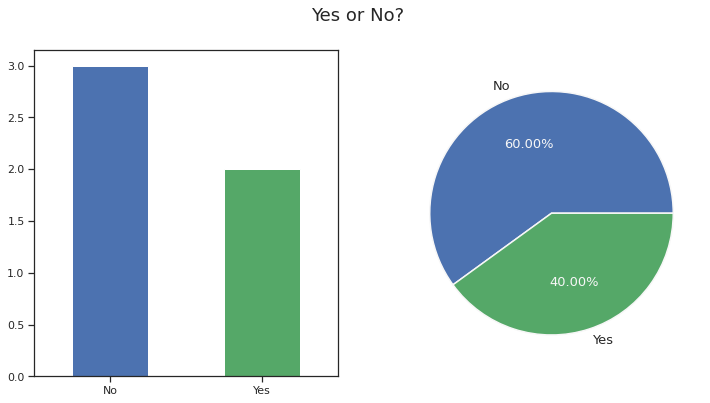

In [80]:
f, ax = plt.subplots(1, 2, figsize = (12, 6))
f.suptitle("Yes or No?", fontsize = 18.)
_ = df.G.value_counts().plot.bar(ax = ax[0], rot = 0, 
                                            color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = df.G.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", 
                                            label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), 
ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

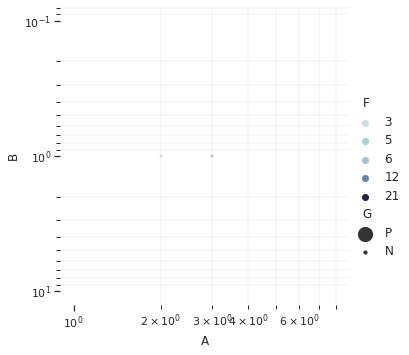

In [81]:
import seaborn as sns
# sns.set_theme(style="whitegrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="A", y="B",
    hue="F", size="G",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

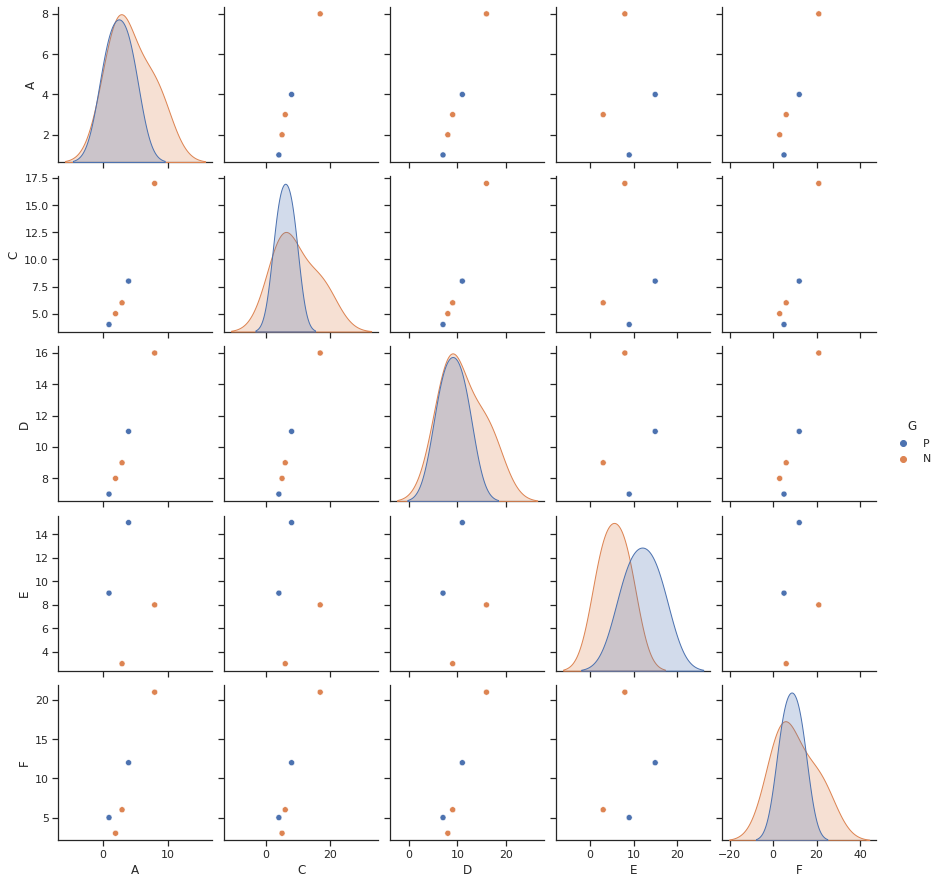

In [82]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue="G")

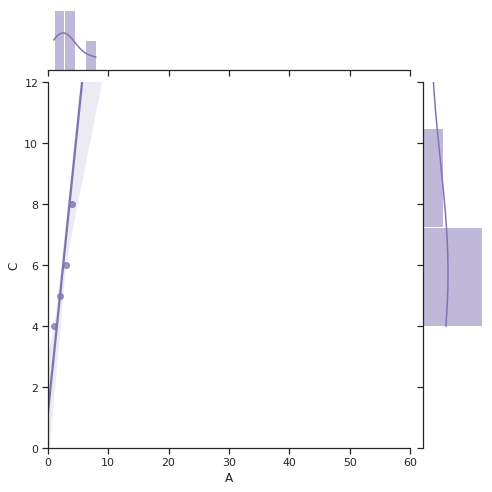

In [83]:
g = sns.jointplot(x="A", y="C", data=df,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

In [84]:
X = df.iloc[:, :-1].values
y = df.iloc[:,6].values

In [85]:
X

array([[1, 'yes', 4, 7, 9.0, 5],
       [2, 'no', 5, 8, nan, 3],
       [3, 'no', 6, 9, 3.0, 6],
       [4, 'yes', 8, 11, 15.0, 12],
       [8, 'yes', 17, 16, 8.0, 21]], dtype=object)

In [86]:
p = X[:, 1:3]
p

array([['yes', 4],
       ['no', 5],
       ['no', 6],
       ['yes', 8],
       ['yes', 17]], dtype=object)

In [87]:
y

array(['P', 'N', 'N', 'P', 'N'], dtype=object)

In [88]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X[:, 0:5])
X[:, 0:5] = imputer.transform(X[:, 0:5])

In [89]:
X

array([[1, 'yes', 4, 7, 9.0, 5],
       [2, 'no', 5, 8, 3.0, 3],
       [3, 'no', 6, 9, 3.0, 6],
       [4, 'yes', 8, 11, 15.0, 12],
       [8, 'yes', 17, 16, 8.0, 21]], dtype=object)

In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [91]:
X

array([[0.0, 1.0, 1, 4, 7, 9.0, 5],
       [1.0, 0.0, 2, 5, 8, 3.0, 3],
       [1.0, 0.0, 3, 6, 9, 3.0, 6],
       [0.0, 1.0, 4, 8, 11, 15.0, 12],
       [0.0, 1.0, 8, 17, 16, 8.0, 21]], dtype=object)

In [92]:
y

array(['P', 'N', 'N', 'P', 'N'], dtype=object)

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [94]:
y

array([1, 0, 0, 1, 0])

In [95]:
X= np.asarray(X)
y= np.asarray(y)

In [96]:
X

array([[0.0, 1.0, 1, 4, 7, 9.0, 5],
       [1.0, 0.0, 2, 5, 8, 3.0, 3],
       [1.0, 0.0, 3, 6, 9, 3.0, 6],
       [0.0, 1.0, 4, 8, 11, 15.0, 12],
       [0.0, 1.0, 8, 17, 16, 8.0, 21]], dtype=object)

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [99]:
X_train

array([[-0.57735027,  0.57735027,  1.58525817,  1.65903012,  1.57142857,
        -0.17586311,  1.52505284],
       [-0.57735027,  0.57735027,  0.09325048, -0.09759001,  0.14285714,
         1.46552595,  0.24826442],
       [ 1.73205081, -1.73205081, -0.65275337, -0.68313005, -0.71428571,
        -1.34828388, -1.02852401],
       [-0.57735027,  0.57735027, -1.02575529, -0.87831007, -1.        ,
         0.05862104, -0.74479325]])

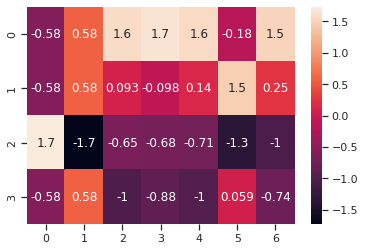

In [100]:
sns.heatmap(X_train, annot=True)

In [101]:
multiclass_y=[1,2,2,2,5,3,1,2,3,4]

In [102]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
label_list = lb.fit_transform(multiclass_y)

In [103]:
label_list

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]])

In [104]:
if X.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")
else:
  print("Ok")

Ok


# Create dates dataframe with frequency 

In [105]:

date = pd.date_range('01/01/2022', periods = 12, freq ='M')
 
date

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', freq='M')

In [106]:
# Create date and time with dataframe
rng = pd.DataFrame()
rng['date'] = pd.date_range('01/01/2022', periods = 12, freq ='M')
 
# Print the dates in dd-mm-yy format
rng[:3]
 
# Create features for year, month, day, hour, and minute
rng['year'] = rng['date'].dt.year
rng['month'] = rng['date'].dt.month
rng['day'] = rng['date'].dt.day
 
# Print the dates divided into features
rng


,date,year,month,day
0,2022-01-31,2022,1,31
1,2022-02-28,2022,2,28
2,2022-03-31,2022,3,31
3,2022-04-30,2022,4,30
4,2022-05-31,2022,5,31
5,2022-06-30,2022,6,30
6,2022-07-31,2022,7,31
7,2022-08-31,2022,8,31
8,2022-09-30,2022,9,30
9,2022-10-31,2022,10,31
